# LSTM model to predict the confirmed cases in India

In [12]:
!pip install Tensorflow

In [13]:
!pip install keras

# Importing required libraries and reading the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt
from datetime import datetime
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

%matplotlib inline

In [2]:
df_d = pd.read_csv('time_series_covid19_deaths_global.csv',index_col='Country/Region')
df_con = pd.read_csv('time_series_covid19_confirmed_global.csv',index_col='Country/Region')
df_r = pd.read_csv('time_series_covid19_recovered_global.csv',index_col='Country/Region')

## dropping the irrelevant columns

In [3]:
df1 = df_con.drop(['Province/State','Long','Lat'],axis=1)
df2 = df_d.drop(['Province/State','Long','Lat'],axis=1)
df3 = df_r.drop(['Province/State','Long','Lat'],axis=1)

In [4]:
df1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
Albania,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
Algeria,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
Andorra,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
Angola,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [5]:
df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
Albania,0,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
Algeria,0,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [6]:
df3.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
Albania,0,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
Algeria,0,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
Andorra,0,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
Angola,0,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


# Swapping rows and columns to get the date as index column

In [7]:
df_con_trans =df1.transpose()
df_d_trans =df2.transpose()
df_r_trans =df3.transpose()

In [8]:
df_con_trans.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,2,0,0,0,0,0


In [9]:
df_d_trans.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_r_trans.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Loc India from all the 3 datasets to make a new dataset with
- India confirmed Case
- India deaths
- India recovered cases

In [11]:
data1 = df_con_trans.loc[:,['India']]
data2 = df_d_trans.loc[:,['India']]
data3 = df_r_trans.loc[:,['India']]

In [12]:
data1.head()

Country/Region,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [13]:
data2.head()

Country/Region,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [14]:
data3.head()

Country/Region,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


# Concatenating all the 3 columns to 1 dataset

In [15]:
data = pd.concat([data1,data2,data3],axis=1)

In [16]:
data

Country/Region,India,India,India
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,5214677,84372,4112551
9/18/20,5308014,85619,4208431
9/19/20,5400619,86752,4303043
9/20/20,5487580,87882,4396399


In [17]:
data.reset_index(inplace = True)

In [18]:
data

Country/Region,index,India,India,India
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
239,9/17/20,5214677,84372,4112551
240,9/18/20,5308014,85619,4208431
241,9/19/20,5400619,86752,4303043
242,9/20/20,5487580,87882,4396399


In [19]:
data.columns

Index(['index', 'India', 'India', 'India'], dtype='object', name='Country/Region')

### Renaming the columns

In [20]:
data.columns=['Date','India_conf','India_deaths','India_recov']

### changing dates to datetime format
### making the list of columns and dates

In [22]:
cols = list(data)[1:4]

In [23]:
cols

['India_conf', 'India_deaths', 'India_recov']

In [24]:
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)

In [25]:
data

,Date,India_conf,India_deaths,India_recov
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
239,2020-09-17,5214677,84372,4112551
240,2020-09-18,5308014,85619,4208431
241,2020-09-19,5400619,86752,4303043
242,2020-09-20,5487580,87882,4396399


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

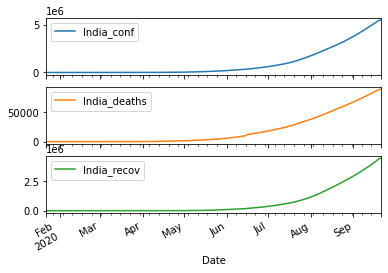

In [26]:
data.set_index('Date')[['India_conf','India_deaths','India_recov']].plot(subplots=True)

In [27]:
data.reset_index(drop=True,inplace=True)

In [28]:
data

,Date,India_conf,India_deaths,India_recov
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
239,2020-09-17,5214677,84372,4112551
240,2020-09-18,5308014,85619,4208431
241,2020-09-19,5400619,86752,4303043
242,2020-09-20,5487580,87882,4396399


In [31]:
datelist_train=list(data['Date'])

In [32]:
data1 = data.iloc[:,1:4]

In [33]:
data1

,India_conf,India_deaths,India_recov
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
239,5214677,84372,4112551
240,5308014,85619,4208431
241,5400619,86752,4303043
242,5487580,87882,4396399


In [34]:
data1 =data1[cols].astype(str)
for i in cols:
    for j in range(0,len(data)):
        data1[i][j] = data1[i][j].replace(',','')
        
data1 = data1.astype(float)

In [35]:
dataset = data.loc[:,'Date']

In [36]:
dataset_train = pd.concat([dataset,data1],axis=1)

In [37]:
dataset_train

,Date,India_conf,India_deaths,India_recov
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
239,2020-09-17,5214677.0,84372.0,4112551.0
240,2020-09-18,5308014.0,85619.0,4208431.0
241,2020-09-19,5400619.0,86752.0,4303043.0
242,2020-09-20,5487580.0,87882.0,4396399.0


In [39]:
dataset_train = dataset_train.set_index('Date')

In [40]:
dataset_train

,India_conf,India_deaths,India_recov
Date,,,
2020-01-22,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0
...,...,...,...
2020-09-17,5214677.0,84372.0,4112551.0
2020-09-18,5308014.0,85619.0,4208431.0
2020-09-19,5400619.0,86752.0,4303043.0


# Scaling the dataset

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset_train)

In [45]:
dataset_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.82229690e-07, 0.00000000e+00, 0.00000000e+00],
       [1.82229690e-07, 0.00000000e+00, 0.00000000e+00],
       [1.82229690e-07, 0.00000000e+00, 0.00000000e+00],
       [3.64459379e-07, 0.00000000e+00, 0.00000000e+00],
       [5.46689069e-07, 0.00000000e+00, 0.00000000e+00],
       [5.46689069e-07, 0.00000000e+00, 0.00000000e+00],
       [5.46689069e-07, 0.00000000e+00, 0.00000000e+00],
       [5.46689069e-07, 0.00000000e+00, 0.00000000e+00],
       [5.46689069e-07, 0.00000000e+00, 0.00000000e+00],
       [5.46689069e-07, 0.00000

In [46]:
features = dataset_scaled
target = dataset_scaled[:,0]

# Splitting the dataset as training and testing data

In [133]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42,shuffle=False)

In [134]:
X_train.shape

(195, 3)

In [135]:
X_test.shape

(49, 3)

# Timeseries generator is used to specify the input(training data) and output (testing data)
- Rolling window 5
- batch size 20

In [160]:
win_length =5
batch_size = 20
num_features = 3
train_generator = TimeseriesGenerator(X_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [161]:
train_generator[0]

(array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.000

# Applying the LSTM model
- Using LeakyReLu as the activation function
- using dropouts to avoid overfitting

In [162]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.TLSM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [163]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 128)            67584     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 5, 128)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

# Applying earlystopping to stop training once the model performance stops improving on the validation dataset

In [164]:
earlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min',verbose=1)

In [165]:
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer = tf.optimizers.Adam(),
             metrics = [tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator,epochs=60,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[earlyStopping])

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
10/10 [==============================] - 13s 258ms/step - loss: 0.0013 - mean_absolute_error: 0.0122 - val_loss: 0.3522 - val_mean_absolute_error: 0.5686
Epoch 2/60
10/10 [==============================] - 0s 32ms/step - loss: 0.0051 - mean_absolute_error: 0.0679 - val_loss: 0.2232 - val_mean_absolute_error: 0.4521
Epoch 3/60
10/10 [==============================] - 0s 32ms/step - loss: 0.0022 - mean_absolute_error: 0.0445 - val_loss: 0.0410 - val_mean_absolute_error: 0.1928
Epoch 4/60
10/10 [==============================] - 0s 34ms/step - loss: 5.2830e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0098 - val_mean_absolute_error: 0.0949
Epoch 5/60
10/10 [==============================] - 0s 34ms/step - loss: 0.0028 - mean_absolute_error: 0.0507 - val_loss: 0.1405 - val_mean_absolute_error: 0.3599
Epoch 6/60
10/10 [==============================] - 0s 31ms/step - loss: 8.2172e-04 - mean_absolute_error: 0.0263 - val_loss: 0.0779 - val_mean_absolute_error: 0.2644
Epoch 7/60
1

## mean squared error =0.00080
## mean_absolute_error = 0.2399

In [166]:
model.evaluate_generator(test_generator,verbose = 0)

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0008055545040406287, 0.023992067202925682]

# Predicting and forecasting

In [167]:
predictions = model.predict_generator(test_generator)

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [168]:
predictions.shape[0]

44

In [169]:
predictions

array([[0.38914856],
       [0.4004431 ],
       [0.41198382],
       [0.42355463],
       [0.43515322],
       [0.4467748 ],
       [0.45828035],
       [0.47032967],
       [0.4826513 ],
       [0.49484846],
       [0.50690055],
       [0.5188192 ],
       [0.53086406],
       [0.5432076 ],
       [0.55608505],
       [0.5687972 ],
       [0.58134055],
       [0.59356385],
       [0.6055566 ],
       [0.6176249 ],
       [0.63026464],
       [0.64341277],
       [0.6573213 ],
       [0.6707063 ],
       [0.6839358 ],
       [0.69702923],
       [0.7101269 ],
       [0.7233994 ],
       [0.73738897],
       [0.7516947 ],
       [0.76607716],
       [0.78054774],
       [0.79504216],
       [0.8094986 ],
       [0.824186  ],
       [0.83931816],
       [0.854595  ],
       [0.8697696 ],
       [0.88480145],
       [0.8994777 ],
       [0.91411066],
       [0.92883587],
       [0.94403636],
       [0.95916474]], dtype=float32)

In [170]:
y_test

array([0.34774053, 0.35799679, 0.36939307, 0.38060693, 0.39234234,
       0.40365225, 0.41341994, 0.42452921, 0.43673842, 0.44850189,
       0.46029798, 0.47196615, 0.48248281, 0.49250872, 0.50427566,
       0.51697196, 0.52952759, 0.54226107, 0.55487847, 0.56606883,
       0.57718029, 0.5876082 , 0.60322291, 0.61730307, 0.63123854,
       0.64559113, 0.65989835, 0.67264003, 0.68691901, 0.70220498,
       0.71739218, 0.73314266, 0.7496585 , 0.76620532, 0.78001997,
       0.79636707, 0.81381283, 0.83140729, 0.84918744, 0.86638482,
       0.88316289, 0.89843538, 0.91485846, 0.93269766, 0.95026897,
       0.96727774, 0.98415312, 1.        , 1.        ])

In [172]:
X_test[:,1:][win_length:]

array([[0.50506361, 0.34931839],
       [0.51497463, 0.36017864],
       [0.52446462, 0.37294135],
       [0.53518354, 0.38576617],
       [0.54664209, 0.39840674],
       [0.55797547, 0.41145856],
       [0.56871714, 0.42358712],
       [0.57942468, 0.43668511],
       [0.58939259, 0.44983883],
       [0.60180697, 0.46351935],
       [0.61293553, 0.47690485],
       [0.62412098, 0.49107144],
       [0.63487404, 0.50554488],
       [0.64525159, 0.51873499],
       [0.65476434, 0.53180683],
       [0.66441365, 0.54694422],
       [0.67541704, 0.55917104],
       [0.6881045 , 0.57405413],
       [0.700132  , 0.58774192],
       [0.71174985, 0.60253812],
       [0.72253704, 0.61730817],
       [0.73358594, 0.63115313],
       [0.74290526, 0.64595638],
       [0.7547962 , 0.66006475],
       [0.76666439, 0.67566479],
       [0.77913566, 0.69082697],
       [0.79152728, 0.70676547],
       [0.8036458 , 0.723516  ],
       [0.81520675, 0.73933895],
       [0.82809904, 0.75606195],
       [0.

# Concatinating prediction and testing datas two other features column to reverse the scale(requires same shape to do the reversing)¶

In [173]:
df_pred = pd.concat([pd.DataFrame(predictions),pd.DataFrame(X_test[:,1:][win_length:])],axis=1)

In [174]:
df_pred

,0,0,1
0,0.389149,0.505064,0.349318
1,0.400443,0.514975,0.360179
2,0.411984,0.524465,0.372941
3,0.423555,0.535184,0.385766
4,0.435153,0.546642,0.398407
5,0.446775,0.557975,0.411459
6,0.458280,0.568717,0.423587
7,0.470330,0.579425,0.436685
8,0.482651,0.589393,0.449839
9,0.494848,0.601807,0.463519


In [175]:
rev_trans = scaler.inverse_transform(df_pred)

In [176]:
rev_trans

array([[2135483.87215197,   44386.        , 1535743.        ],
       [2197463.58450592,   45257.        , 1583489.        ],
       [2260794.15896952,   46091.        , 1639599.        ],
       [2324289.9114877 ,   47033.        , 1695982.        ],
       [2387938.08573544,   48040.        , 1751555.        ],
       [2451712.51489222,   49036.        , 1808936.        ],
       [2514850.10905445,   49980.        , 1862258.        ],
       [2580971.70201242,   50921.        , 1919842.        ],
       [2648587.58396506,   51797.        , 1977671.        ],
       [2715520.51190197,   52888.        , 2037816.        ],
       [2781657.31432438,   53866.        , 2096664.        ],
       [2847061.93639994,   54849.        , 2158946.        ],
       [2913158.99796367,   55794.        , 2222577.        ],
       [2980895.0837481 ,   56706.        , 2280566.        ],
       [3051561.19926095,   57542.        , 2338035.        ],
       [3121319.98027205,   58390.        , 2404585.   

In [177]:
rev_trans[0]

array([2135483.87215197,   44386.        , 1535743.        ])

# final dataset is made with testing data and prediction column

In [178]:
df_final  = dataset_train[predictions.shape[0]*-1:]

In [179]:
df_final.count()

India_conf      44
India_deaths    44
India_recov     44
dtype: int64

In [180]:
df_final['pred']=rev_trans[:,0].round(1)

<ipython-input-180-d4a835ac7dd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred']=rev_trans[:,0].round(1)


In [181]:
df_final

,India_conf,India_deaths,India_recov,pred
Date,,,,
2020-08-09,2215074.0,44386.0,1535743.0,2135483.9
2020-08-10,2268675.0,45257.0,1583489.0,2197463.6
2020-08-11,2329638.0,46091.0,1639599.0,2260794.2
2020-08-12,2396637.0,47033.0,1695982.0,2324289.9
2020-08-13,2461190.0,48040.0,1751555.0,2387938.1
2020-08-14,2525922.0,49036.0,1808936.0,2451712.5
2020-08-15,2589952.0,49980.0,1862258.0,2514850.1
2020-08-16,2647663.0,50921.0,1919842.0,2580971.7
2020-08-17,2702681.0,51797.0,1977671.0,2648587.6


<AxesSubplot:xlabel='Date'>

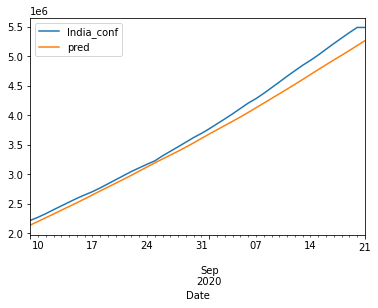

In [182]:
df_final[['India_conf','pred']].plot()

## An LSTM model has been developed to predict India confirmed cases
# mean squared error =0.0008
# mean_absolute error = 0.2339